In [1]:
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
import cv2 as cv
import seaborn as sns

from util_plots2 import *
# sns.set_style('whitegrid')
# sns.set_color_codes('bright')


In [2]:
df = pd.read_csv('../train.csv')

# count_patients = df.patient_id.unique().size

print("Columns:", df.columns)
print("Number of samples:", len(df))
print("Number of samples with cancer:", len(df[df["cancer"]==1]))
print("Number of samples with no cancer:", len(df[df["cancer"]==0]))
# print("Number of patients:", count_patients)

#laterality = left or right
# density = A rating for how dense the breast tissue is,
#           A being the least dense and D being the most dense. Extremely dense tissue can make diagnosis more difficult. 


Columns: Index(['site_id', 'patient_id', 'image_id', 'laterality', 'view', 'age',
       'cancer', 'biopsy', 'invasive', 'BIRADS', 'implant', 'density',
       'machine_id', 'difficult_negative_case'],
      dtype='object')
Number of samples: 54706
Number of samples with cancer: 1158
Number of samples with no cancer: 53548


In [ ]:
df[df["age"] <50]

In [3]:
df.patient_id.nunique()

11913

In [9]:
print(df)

       site_id  patient_id    image_id laterality view   age  cancer  biopsy  \
0            2       10006   462822612          L   CC  61.0       0       0   
1            2       10006  1459541791          L  MLO  61.0       0       0   
2            2       10006  1864590858          R  MLO  61.0       0       0   
3            2       10006  1874946579          R   CC  61.0       0       0   
4            2       10011   220375232          L   CC  55.0       0       0   
...        ...         ...         ...        ...  ...   ...     ...     ...   
54701        1        9973  1729524723          R  MLO  43.0       0       0   
54702        1        9989    63473691          L  MLO  60.0       0       0   
54703        1        9989  1078943060          L   CC  60.0       0       0   
54704        1        9989   398038886          R  MLO  60.0       0       0   
54705        1        9989   439796429          R   CC  60.0       0       0   

       invasive  BIRADS  implant densit

In [12]:
print(len(df[df["cancer"] ==1]))

1158


In [6]:
df.head(10)

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True
5,2,10011,270344397,L,MLO,55.0,0,0,0,0.0,0,NaN,21,True
6,2,10011,541722628,R,CC,55.0,0,0,0,NaN,0,NaN,21,False
7,2,10011,1031443799,R,MLO,55.0,0,0,0,NaN,0,NaN,21,False
8,2,10025,562340703,L,CC,75.0,0,0,0,NaN,0,NaN,29,False
9,2,10025,1365269360,L,MLO,75.0,0,0,0,NaN,0,NaN,29,False


machines

In [3]:
machines_list = df['machine_id'].tolist()
print(len(df.machine_id.unique()))
df.machine_id.unique()

10


array([ 29,  21, 216,  93,  49,  48, 170, 210, 190, 197], dtype=int64)

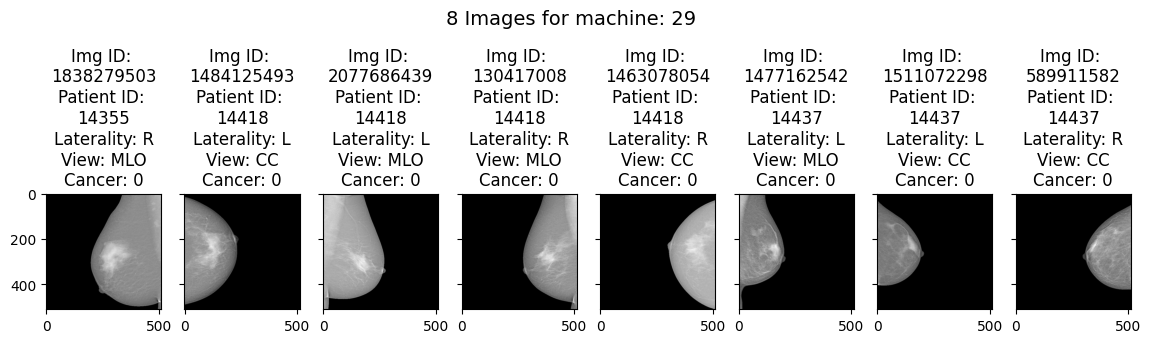

In [5]:
import random

selected_machine = 29
rand_index_density = random.randint(0, len(df[df["machine_id"] == selected_machine])-10)

image_count_selected_patient = 8
selected_density_df = df[df["machine_id"] == selected_machine].iloc[rand_index_density : rand_index_density+image_count_selected_patient]


img_links_density = []
for index, row in selected_density_df.iterrows():
    img_file_name = str(row["patient_id"])+"_"+str(row["image_id"])+".png"
    # print('/images/'+img_file_name)
    img = np.asarray(Image.open('../images/'+img_file_name))
    img_links_density.append(img_file_name)



f, axarr = plt.subplots(1, image_count_selected_patient, 
                        sharey=True,
                        figsize=(14, 5))
f.suptitle(f'{image_count_selected_patient} Images for machine: {selected_machine}', fontsize=14)

counter_img_d = 0
for index, row in selected_density_df.iterrows():
    img = np.asarray(Image.open('../images/'+img_links_density[counter_img_d]))
    axarr[counter_img_d].imshow(img, 'gray')
    axarr[counter_img_d].set_title("Img ID: "+"\n"+str(row["image_id"])+"\n"+
                                   "Patient ID: "+"\n"+str(row["patient_id"])+"\n"+
                                "Laterality: "+str(row["laterality"])+"\n"+
                                "View: "+str(row["view"])+"\n"+
                                "Cancer: "+str(row["cancer"]))
    counter_img_d+=1

<AxesSubplot: xlabel='view', ylabel='count'>

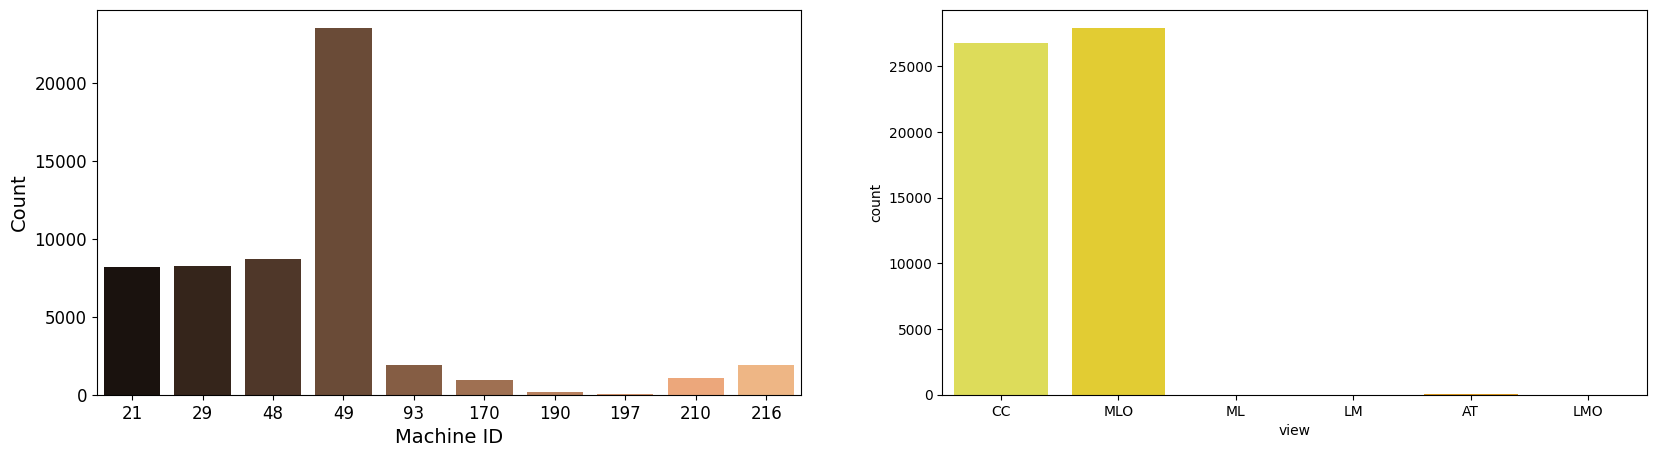

In [6]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.countplot(data=df,x=df.machine_id, ax=ax[0], palette='copper')
ax[0].tick_params(axis='both', labelsize=12)
ax[0].set_xlabel('Machine ID', fontsize = 14)
ax[0].set_ylabel('Count', fontsize = 14)
sns.countplot(data=df,x=df.view, ax=ax[1], palette='Wistia')




In [68]:
img_w_21 = 0
img_w_29 = 0
img_w_48 = 0
img_w_49 = 0
img_w_93 = 0
img_w_170 = 0
img_w_190 = 0
img_w_197 = 0
img_w_210 = 0
img_w_216 = 0

source_imgs = "../images/"
target_imgs = "../ds_machine_id"



for index, row in df.iterrows():
    img_file_name = str(row["patient_id"]) + "_" + str(row["image_id"]) + ".png"
    
    if (row["machine_id"] == 21):
        # if (row["patient_id"] not in patient_list_hybrid_unique):
        shutil.copy(source_imgs+img_file_name, target_imgs+"/21/"+img_file_name)
        img_w_21 +=1
    
    if (row["machine_id"] == 29):
        # if (row["patient_id"] not in patient_list_hybrid_unique):
        shutil.copy(source_imgs+img_file_name, target_imgs+"/29/"+img_file_name)
        img_w_29 +=1

    if (row["machine_id"] == 48):
        # if (row["patient_id"] not in patient_list_hybrid_unique):
        shutil.copy(source_imgs+img_file_name, target_imgs+"/48/"+img_file_name)
        img_w_48 +=1

    if (row["machine_id"] == 49):
        # if (row["patient_id"] not in patient_list_hybrid_unique):
        shutil.copy(source_imgs+img_file_name, target_imgs+"/49/"+img_file_name)
        img_w_49 +=1

    if (row["machine_id"] == 93):
        # if (row["patient_id"] not in patient_list_hybrid_unique):
        shutil.copy(source_imgs+img_file_name, target_imgs+"/93/"+img_file_name)
        img_w_93 +=1

    if (row["machine_id"] == 170):
        # if (row["patient_id"] not in patient_list_hybrid_unique):
        shutil.copy(source_imgs+img_file_name, target_imgs+"/170/"+img_file_name)
        img_w_170 +=1

    if (row["machine_id"] == 190):
        # if (row["patient_id"] not in patient_list_hybrid_unique):
        shutil.copy(source_imgs+img_file_name, target_imgs+"/190/"+img_file_name)
        img_w_190 +=1

    if (row["machine_id"] == 197):
        # if (row["patient_id"] not in patient_list_hybrid_unique):
        shutil.copy(source_imgs+img_file_name, target_imgs+"/197/"+img_file_name)
        img_w_197 +=1

    if (row["machine_id"] == 210):
        # if (row["patient_id"] not in patient_list_hybrid_unique):
        shutil.copy(source_imgs+img_file_name, target_imgs+"/210/"+img_file_name)
        img_w_210 +=1
        
    if (row["machine_id"] == 216):
        # if (row["patient_id"] not in patient_list_hybrid_unique):
        shutil.copy(source_imgs+img_file_name, target_imgs+"/216/"+img_file_name)
        img_w_216 +=1





FileNotFoundError: [WinError 3] Sistem belirtilen yolu bulamıyor: '../ds_machine_id21'

In [69]:
print(len(os.listdir(target_imgs+"/21")))
print(len(os.listdir(target_imgs+"/29")))
print(len(os.listdir(target_imgs+"/48")))
print(len(os.listdir(target_imgs+"/49")))
print(len(os.listdir(target_imgs+"/93")))
print(len(os.listdir(target_imgs+"/170")))
print(len(os.listdir(target_imgs+"/190")))
print(len(os.listdir(target_imgs+"/197")))
print(len(os.listdir(target_imgs+"/210")))
print(len(os.listdir(target_imgs+"/216")))

8221
8267
8699
23529
1915
923
145
29
1070
1908


In [11]:
count_cancer_pt = 0

patient_list_cancer = []

for index, row in df.iterrows():

    selected_pt_id = row["patient_id"]

    if row["patient_id"] == selected_pt_id:
        if row["cancer"] == 1:
            patient_list_cancer.append(selected_pt_id)
            count_cancer_pt +=1
        # print(selected_pt_id,"--",row["cancer"],"--",count_cancer_pt)

print(len(patient_list_cancer))

patient_list_cancer_unique = list(dict.fromkeys(patient_list_cancer))
print(len(patient_list_cancer_unique))

1158
486


In [12]:
patient_list_cancer

[10130,
 10130,
 10130,
 10130,
 10226,
 10226,
 1025,
 1025,
 10432,
 10432,
 10589,
 10589,
 10589,
 106,
 106,
 10635,
 10635,
 10638,
 10638,
 10668,
 10668,
 10940,
 10940,
 1109,
 1109,
 11094,
 11094,
 11094,
 11094,
 11249,
 11249,
 11341,
 11341,
 11365,
 11365,
 11817,
 11817,
 11919,
 11919,
 11937,
 11937,
 12153,
 12153,
 12153,
 12195,
 12195,
 12258,
 12258,
 12282,
 12282,
 12305,
 12305,
 12392,
 12392,
 12463,
 12463,
 12485,
 12485,
 12522,
 12522,
 12651,
 12651,
 12725,
 12725,
 12725,
 12725,
 12918,
 12918,
 12988,
 12988,
 13101,
 13101,
 13116,
 13116,
 13116,
 13267,
 13267,
 13267,
 13331,
 13331,
 13331,
 1336,
 1336,
 13463,
 13463,
 13756,
 13756,
 13845,
 13845,
 13845,
 13920,
 13920,
 14292,
 14292,
 14292,
 14292,
 14327,
 14327,
 14706,
 14706,
 14769,
 14769,
 14941,
 14941,
 14962,
 14962,
 15078,
 15078,
 15078,
 1524,
 1524,
 1524,
 15268,
 15268,
 15696,
 15696,
 15696,
 15945,
 15945,
 16145,
 16145,
 16145,
 16249,
 16249,
 16346,
 16346,
 1645

In [13]:
patient_list_cancer_unique

[10130,
 10226,
 1025,
 10432,
 10589,
 106,
 10635,
 10638,
 10668,
 10940,
 1109,
 11094,
 11249,
 11341,
 11365,
 11817,
 11919,
 11937,
 12153,
 12195,
 12258,
 12282,
 12305,
 12392,
 12463,
 12485,
 12522,
 12651,
 12725,
 12918,
 12988,
 13101,
 13116,
 13267,
 13331,
 1336,
 13463,
 13756,
 13845,
 13920,
 14292,
 14327,
 14706,
 14769,
 14941,
 14962,
 15078,
 1524,
 15268,
 15696,
 15945,
 16145,
 16249,
 16346,
 16451,
 16518,
 16639,
 16668,
 16694,
 16703,
 16955,
 1703,
 17222,
 17535,
 17562,
 1759,
 1775,
 17891,
 17894,
 18026,
 18316,
 18399,
 18421,
 18709,
 1878,
 18839,
 19003,
 19028,
 19064,
 19159,
 19171,
 19182,
 19486,
 1963,
 19750,
 20009,
 20053,
 20251,
 20923,
 21067,
 21315,
 2133,
 21445,
 21720,
 2179,
 21867,
 21880,
 21888,
 21923,
 21928,
 21957,
 22502,
 22562,
 22616,
 22860,
 22948,
 23101,
 23224,
 23386,
 2346,
 236,
 23693,
 24240,
 24643,
 24656,
 2489,
 24916,
 24947,
 25178,
 25187,
 25323,
 25423,
 25432,
 25523,
 25550,
 25679,
 25709,
 

In [14]:
patient_list_hybrid = []
for index, row in df.iterrows():
    if (row["cancer"] == 0):
        if row["patient_id"] in patient_list_cancer_unique:
            patient_list_hybrid.append(row["patient_id"])

print(len(patient_list_hybrid))

patient_list_hybrid_unique = list(dict.fromkeys(patient_list_hybrid))
print(len(patient_list_hybrid_unique))

1122
480


In [31]:
patient_list_both_uniquelist = (set(patient_list_cancer_unique) - set(patient_list_hybrid_unique))
patient_list_both_uniquelist

{1759, 6654, 16518, 31964, 45137, 54463}

In [41]:
patient_id_list = df.patient_id.tolist()
print(len(patient_id_list))
patient_id_list_unique = list(dict.fromkeys(patient_id_list))
print(len(patient_id_list_unique))


54706
11913


In [42]:
patient_list_hybrid_unique

[10130,
 10226,
 1025,
 10432,
 10589,
 106,
 10635,
 10638,
 10668,
 10940,
 1109,
 11094,
 11249,
 11341,
 11365,
 11817,
 11919,
 11937,
 12153,
 12195,
 12258,
 12282,
 12305,
 12392,
 12463,
 12485,
 12522,
 12651,
 12725,
 12918,
 12988,
 13101,
 13116,
 13267,
 13331,
 1336,
 13463,
 13756,
 13845,
 13920,
 14292,
 14327,
 14706,
 14769,
 14941,
 14962,
 15078,
 1524,
 15268,
 15696,
 15945,
 16145,
 16249,
 16346,
 16451,
 16639,
 16668,
 16694,
 16703,
 16955,
 1703,
 17222,
 17535,
 17562,
 1775,
 17891,
 17894,
 18026,
 18316,
 18399,
 18421,
 18709,
 1878,
 18839,
 19003,
 19028,
 19064,
 19159,
 19171,
 19182,
 19486,
 1963,
 19750,
 20009,
 20053,
 20251,
 20923,
 21067,
 21315,
 2133,
 21445,
 21720,
 2179,
 21867,
 21880,
 21888,
 21923,
 21928,
 21957,
 22502,
 22562,
 22616,
 22860,
 22948,
 23101,
 23224,
 23386,
 2346,
 236,
 23693,
 24240,
 24643,
 24656,
 2489,
 24916,
 24947,
 25178,
 25187,
 25323,
 25423,
 25432,
 25523,
 25550,
 25679,
 25709,
 25895,
 25909,


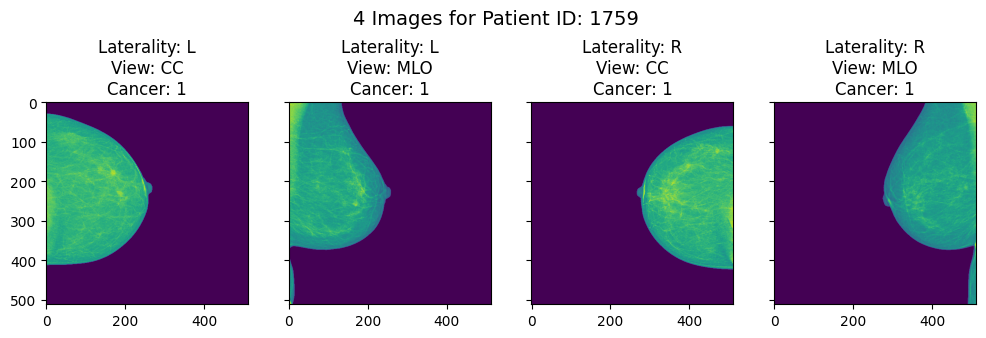

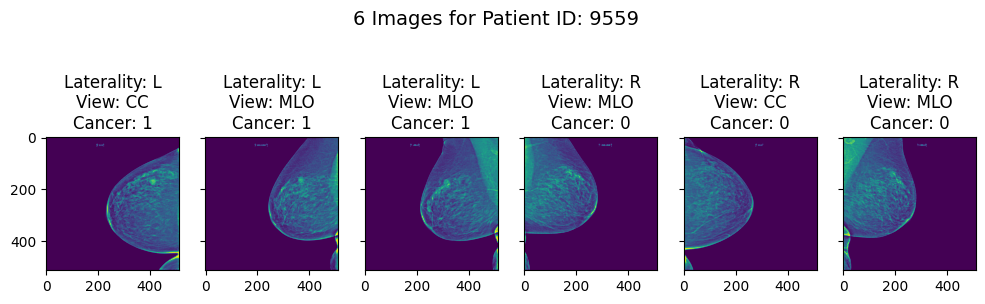

In [43]:
plot_mamm_images(1759,df)
# plot_mamm_images(6654,df)
# plot_mamm_images(16518,df)
# plot_mamm_images(31964,df)

plot_mamm_images(9559,df)

In [47]:
df_densABC = df[df["density"] != "D"]
df_densABC_imp0 = df_densABC[df_densABC["implant"] != 1]
print(len(df_densABC_imp0))
print(len(df_densABC_imp0[df_densABC_imp0["cancer"] == 1]))

51754
1120


In [49]:
img_w_mlo0 = 0
img_w_cc0 = 0
img_w_mlo1 = 0
img_w_cc1 = 0

source_imgs = "../images/"
target_imgs = "imp0_abc_v1"
target_path_cc0 = "../ds/"+target_imgs+"/cc/0/"
target_path_mlo0 = "../ds/"+target_imgs+"/mlo/0/"

target_path_cc1 = "../ds/"+target_imgs+"/cc/1/"
target_path_mlo1 = "../ds/"+target_imgs+"/mlo/1/"

for index, row in df_densABC_imp0.iterrows():
    img_file_name = str(row["patient_id"]) + "_" + str(row["image_id"]) + ".png"
    
    if (row["view"] == "CC") and (row["cancer"]==0):
        # if (row["patient_id"] not in patient_list_hybrid_unique):
        shutil.copy(source_imgs+img_file_name, target_path_cc0+img_file_name)
        img_w_cc0 +=1

    if (row["view"] == "CC") and (row["cancer"]==1):
        shutil.copy(source_imgs+img_file_name, target_path_cc1+img_file_name)
        img_w_cc1 +=1

    if (row["view"] == "MLO") and (row["cancer"]==0):
        # if (row["patient_id"] not in patient_list_hybrid_unique):
        shutil.copy(source_imgs+img_file_name, target_path_mlo0+img_file_name)
        img_w_mlo0 +=1

    if (row["view"] == "MLO") and (row["cancer"]==1):
        shutil.copy(source_imgs+img_file_name, target_path_mlo1+img_file_name)
        img_w_mlo1 +=1



print(img_w_cc0)
print(img_w_cc1)
print(img_w_mlo0)
print(img_w_mlo1)

imgs_in_folder_cc0 = len(os.listdir(target_path_cc0))
imgs_in_folder_cc1 = len(os.listdir(target_path_cc1))
imgs_in_folder_mlo0 = len(os.listdir(target_path_mlo0))
imgs_in_folder_mlo1 = len(os.listdir(target_path_mlo1))

print(imgs_in_folder_cc0)
print(imgs_in_folder_cc1)
print(imgs_in_folder_mlo0)
print(imgs_in_folder_mlo1)

24749
546
25851
572
24749
546
25851
572


In [ ]:
img_w_mlo0 = 0
img_w_cc0 = 0
img_w_mlo1 = 0
img_w_cc1 = 0

source_imgs = "../images/"
target_imgs = "hybrid_imp0_abc"
target_path_cc0 = "../ds/"+target_imgs+"/cc/0/"
target_path_mlo0 = "../ds/"+target_imgs+"/mlo/0/"

target_path_cc1 = "../ds/"+target_imgs+"/cc/1/"
target_path_mlo1 = "../ds/"+target_imgs+"/mlo/1/"

# for index, row in df_densABC_imp0.iterrows():
    # img_file_name = str(row["patient_id"]) + "_" + str(row["image_id"]) + ".png"
    
    # if (row["view"] == "CC") and (row["cancer"]==0):
    #     if (row["patient_id"] in patient_list_hybrid_unique):
    #         shutil.copy(source_imgs+img_file_name, target_path_cc0+img_file_name)
    #         img_w_cc0 +=1

    # if (row["view"] == "CC") and (row["cancer"]==1):
    #     if (row["patient_id"] in patient_list_hybrid_unique):
    #         shutil.copy(source_imgs+img_file_name, target_path_cc1+img_file_name)
    #         img_w_cc1 +=1

    # if (row["view"] == "MLO") and (row["cancer"]==0):
    #     if (row["patient_id"] in patient_list_hybrid_unique):
    #         shutil.copy(source_imgs+img_file_name, target_path_mlo0+img_file_name)
    #         img_w_mlo0 +=1

    # if (row["view"] == "MLO") and (row["cancer"]==1):
    #     if (row["patient_id"] in patient_list_hybrid_unique):
    #         shutil.copy(source_imgs+img_file_name, target_path_mlo1+img_file_name)
    #         img_w_mlo1 +=1



print(img_w_cc0)
print(img_w_cc1)
print(img_w_mlo0)
print(img_w_mlo1)

imgs_in_folder_cc0 = len(os.listdir(target_path_cc0))
imgs_in_folder_cc1 = len(os.listdir(target_path_cc1))
imgs_in_folder_mlo0 = len(os.listdir(target_path_mlo0))
imgs_in_folder_mlo1 = len(os.listdir(target_path_mlo1))

print(imgs_in_folder_cc0)
print(imgs_in_folder_cc1)
print(imgs_in_folder_mlo0)
print(imgs_in_folder_mlo1)

# plots

In [ ]:
ages = df[df.age.isnull() == False].groupby('patient_id').age.apply(lambda l: np.unique(l)[0])

fig, ax = plt.subplots(1, 2, figsize=(18,6))
fig.tight_layout(pad=5.0)

sns.histplot(ages, color='green', bins=64, ax=ax[0])
ax[0].set_title('Age distribution of patients', fontsize=14);
ax[0].tick_params(axis='both', labelsize=12)
ax[0].set_xlabel('Age', fontsize = 14)
ax[0].set_ylabel('Count', fontsize = 14)

sns.violinplot(data=df, x="cancer", y="age", ax=ax[1], palette='Set1');
ax[1].set_title('Age distribution of patients', fontsize=14);
ax[1].tick_params(axis='both', labelsize=14)
ax[1].set_xlabel('Cancer', fontsize = 14)
ax[1].set_ylabel('Age', fontsize = 14)


In [8]:
def has_cancer(l):
    if len(l) == 1:
        if l[0] == 0:
            return False
        elif l[0] == 1:
            return True
        else:
            raise Exception
    elif len(l) == 2:
        return True
    else:
        raise Exception

patient_cancer_map = df.groupby('patient_id').cancer.unique().apply(lambda l: has_cancer(l)).to_numpy()

In [ ]:
fig, ax = plt.subplots(2,1,figsize=(10,10))
fig.tight_layout(pad=5.0)

sns.countplot(data=df,x=patient_cancer_map, palette='RdYlGn', ax=ax[0]);
ax[0].set_title('Number of patients with cancer', fontsize=14);
ax[0].tick_params(axis='both', labelsize=12)
ax[0].set_xlabel('Cancer', fontsize = 14)
ax[0].set_ylabel('Count', fontsize = 14)

sns.countplot(data=df, x=df.groupby('patient_id').size(), palette='Spectral', ax=ax[1])
ax[1].set_title('Number of images per patient', fontsize=14)
ax[1].tick_params(axis='both', labelsize=12)
ax[1].set_xlabel('Number of images', fontsize = 14)
ax[1].set_ylabel('Counts of patients', fontsize = 14)


In [ ]:
df.groupby('patient_id').size().tolist()

In [51]:
print(len(df.groupby('patient_id').size().tolist()))

11913


In [154]:
df.groupby('patient_id').size()

patient_id
5        4
25       6
28       4
30       4
33       5
        ..
65518    4
65525    4
65526    4
65530    6
65534    4
Length: 11913, dtype: int64

In [54]:
df.groupby('patient_id').size().values

array([4, 6, 4, ..., 4, 6, 4], dtype=int64)

Text(0, 0.5, 'Count')

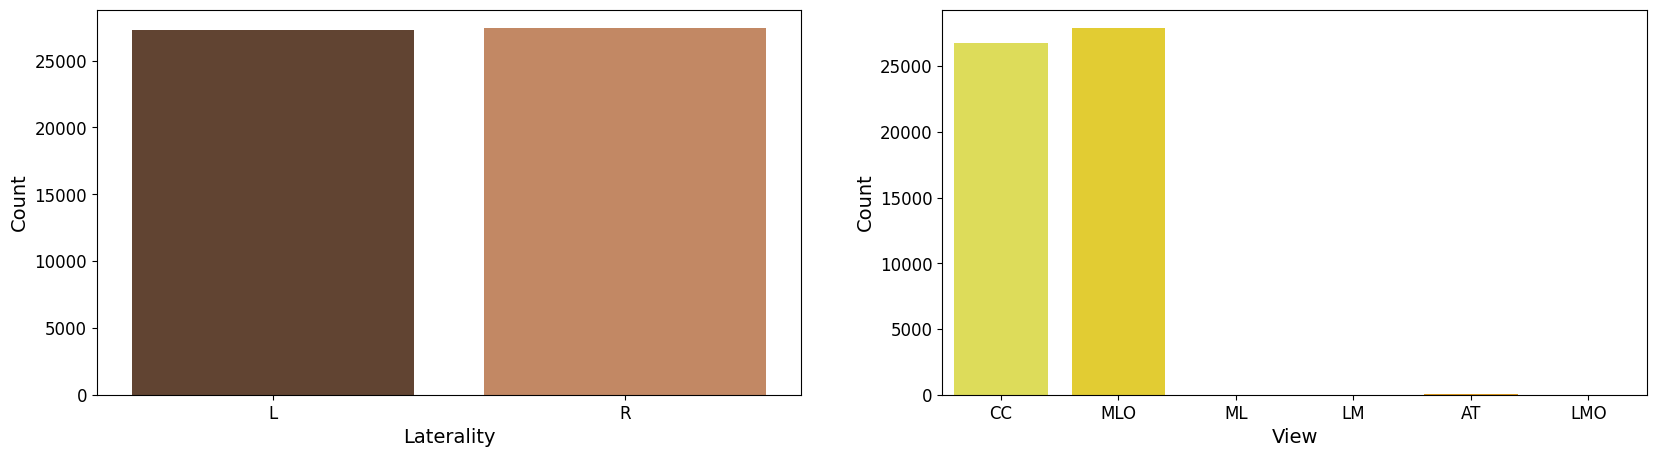

In [49]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.countplot(data=df,x=df.laterality, ax=ax[0], palette='copper')
ax[0].tick_params(axis='both', labelsize=12)
ax[0].set_xlabel('Laterality', fontsize = 14)
ax[0].set_ylabel('Count', fontsize = 14)
sns.countplot(data=df,x=df.view, ax=ax[1], palette='Wistia')
ax[1].tick_params(axis='both', labelsize=12)
ax[1].set_xlabel('View', fontsize = 14)
ax[1].set_ylabel('Count', fontsize = 14)



In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.countplot(data=df,x=df.implant, ax=ax[0], palette='inferno')
ax[0].tick_params(axis='both', labelsize=12)
ax[0].set_xlabel('Implant', fontsize = 14)
ax[0].set_ylabel('Count', fontsize = 14)
sns.countplot(data=df,x=df.density, ax=ax[1], palette='viridis')
ax[1].tick_params(axis='both', labelsize=12)
ax[1].set_xlabel('Density', fontsize = 14)
ax[1].set_ylabel('Count', fontsize = 14)

In [3]:
print(df["density"].unique())
print(df["density"].nunique())

print("A:",len(df[df["density"] == "A"]))
print("B:",len(df[df["density"] == "B"]))
print("C:",len(df[df["density"] == "C"]))
print("D:",len(df[df["density"] == "D"]))

[nan 'C' 'D' 'B' 'A']
4
A: 3105
B: 12651
C: 12175
D: 1539


In [155]:
print(df["view"].unique())
print(df["view"].nunique())

print("CC:",len(df[df["view"] == "CC"]))
print("MLO:",len(df[df["view"] == "MLO"]))


['CC' 'MLO' 'ML' 'LM' 'AT' 'LMO']
6
CC: 26765
MLO: 27903


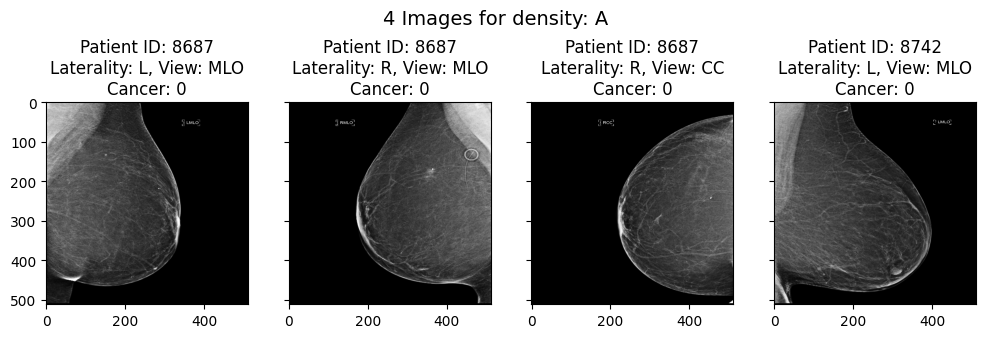

In [6]:
import random

selected_density = "A"
rand_index_density = random.randint(0, len(df[df["density"] == selected_density])-10)

selected_density_df = df[df["density"] == selected_density].iloc[rand_index_density : rand_index_density+4]

image_count_selected_patient = 4

img_links_density = []
for index, row in selected_density_df.iterrows():
    img_file_name = str(row["patient_id"])+"_"+str(row["image_id"])+".png"
    # print('/images/'+img_file_name)
    img = np.asarray(Image.open('images/'+img_file_name))
    img_links_density.append(img_file_name)



f, axarr = plt.subplots(1, image_count_selected_patient, 
                        sharey=True,
                        figsize=(12, 4))
f.suptitle(f'{image_count_selected_patient} Images for density: {selected_density}', fontsize=14)

counter_img_d = 0
for index, row in selected_density_df.iterrows():
    img = np.asarray(Image.open('images/'+img_links_density[counter_img_d]))
    axarr[counter_img_d].imshow(img, 'gray')
    axarr[counter_img_d].set_title("Patient ID: "+str(row["patient_id"])+"\n"+
                                "Laterality: "+str(row["laterality"])+
                                ", View: "+str(row["view"])+"\n"+
                                "Cancer: "+str(row["cancer"]))
    counter_img_d+=1

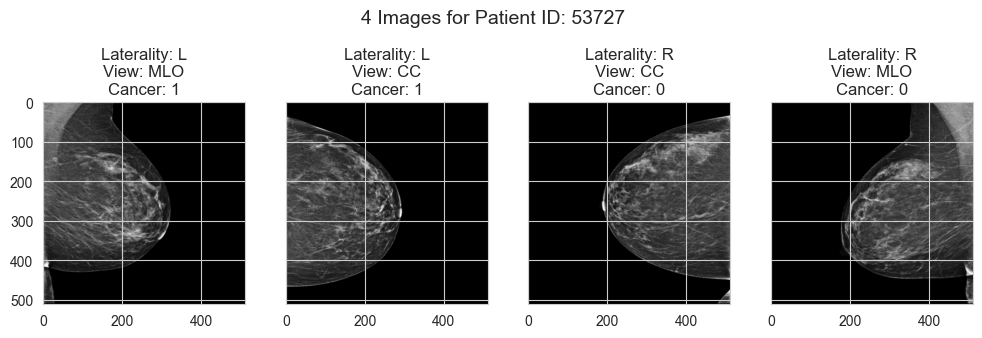

In [7]:
# get a patient's image with patient ID

selected_patient_id = 53727
# selected_patient_id = 10049
selected_patient_df = df.loc[df["patient_id"] == selected_patient_id]
# print(selected_patient_df)
image_count_selected_patient = len(df.loc[df["patient_id"] == selected_patient_id])

img_links = []
for index, row in selected_patient_df.iterrows():
    img_file_name = str(row["patient_id"])+"_"+str(row["image_id"])+".png"
    # print('/images/'+img_file_name)
    img = np.asarray(Image.open('images/'+img_file_name))
    img_links.append(img_file_name)



f, axarr = plt.subplots(1, image_count_selected_patient, 
                        sharey=True,
                        figsize=(12, 4))
f.suptitle(f'{image_count_selected_patient} Images for Patient ID: {selected_patient_id}', fontsize=14)

counter_img = 0
for index, row in selected_patient_df.iterrows():
    img = np.asarray(Image.open('images/'+img_links[counter_img]))
    axarr[counter_img].imshow(img, 'gray')
    axarr[counter_img].set_title("Laterality: "+str(row["laterality"])+"\n"+
                                "View: "+str(row["view"])+"\n"+
                                "Cancer: "+str(row["cancer"]))
    counter_img+=1



In [8]:
# copy images to new folder

img_w_cancer = 0
img_w_no_cancer = 0

target_path_0 = "rsna_dset_1/0/"
target_path_1 = "rsna_dset_1/1/"

# for index, row in df.iterrows():
#     img_file_name = str(row["patient_id"])+"_"+str(row["image_id"])+".png"
    
#     if row["cancer"] == 1:
#         shutil.copy('images/'+img_file_name, target_path_1+img_file_name)
#         img_w_cancer +=1

#     if row["cancer"] == 0:
#         shutil.copy('images/'+img_file_name, target_path_0+img_file_name)
#         img_w_no_cancer +=1
    
print(img_w_cancer)
print(img_w_no_cancer)

imgs_in_folder0 = len(os.listdir(target_path_0))
imgs_in_folder1 = len(os.listdir(target_path_1))
print(imgs_in_folder0)
print(imgs_in_folder1)

0
0
53548
1158


In [9]:
print(os.listdir(target_path_0))

['10006_1459541791.png', '10006_1864590858.png', '10006_1874946579.png', '10006_462822612.png', '10011_1031443799.png', '10011_220375232.png', '10011_270344397.png', '10011_541722628.png', '10025_1365269360.png', '10025_288394860.png', '10025_562340703.png', '10025_893612858.png', '10038_1350492010.png', '10038_1967300488.png', '10038_2142944869.png', '10038_850559196.png', '10042_102733848.png', '10042_1648588715.png', '10042_202939811.png', '10042_294481519.png', '10042_495770405.png', '10048_1234933874.png', '10048_1577142909.png', '10048_1842203124.png', '10048_964141995.png', '10049_1207499426.png', '10049_1351270472.png', '10049_1464813991.png', '10049_349510516.png', '10049_906829939.png', '10049_94335194.png', '10050_1428987847.png', '10050_1614607569.png', '10050_1749389520.png', '10050_588678397.png', '10051_1238319934.png', '10051_2046475482.png', '10051_833024366.png', '10051_938549206.png', '10086_1479874325.png', '10086_1973073874.png', '10086_2029358943.png', '10086_5108

In [10]:
patient_ids_path0 = []
patient_ids_path1 = []
patients_ids_common = []


for path0_file in os.listdir(target_path_0):
    # print(path0_file.split("_")[0])
    patient_ids_path0.append(path0_file.split("_")[0])

for path1_file in os.listdir(target_path_1):
    # print(path1_file.split("_")[0])
    patient_ids_path1.append(path1_file.split("_")[0])

for patient_id_path0 in patient_ids_path0:
   for patient_id_path1 in patient_ids_path1: 
        if (patient_id_path0 == patient_id_path1) and (patient_id_path1 not in patients_ids_common):
           patients_ids_common.append(patient_id_path1)
           break
    




In [11]:
print("Number of files in path0:",len(patient_ids_path0))
print("Number of files in path1:",len(patient_ids_path1))

unique_patient_ids_path0 = list(set(patient_ids_path0)) 
unique_patient_ids_path1 = list(set(patient_ids_path1)) 
unique_patient_ids_path1 = list(set(patient_ids_path1)) 
print("Number of patients in path0:",len(unique_patient_ids_path0))
print("Number of patients in path1:",len(unique_patient_ids_path1))
print("Number of patients whose images sharedin both files:",len(patients_ids_common))

print(unique_patient_ids_path0)
print(unique_patient_ids_path1)
print(patients_ids_common)

Number of files in path0: 53548
Number of files in path1: 1158
Number of patients in path0: 11907
Number of patients in path1: 486
Number of patients whose images sharedin both files: 480
['17884', '36942', '48271', '9069', '23065', '32272', '31144', '10541', '2541', '26284', '5437', '31227', '46381', '36304', '58006', '15525', '63352', '45592', '17586', '596', '39392', '12026', '19085', '49621', '55987', '27667', '56477', '31774', '64766', '39909', '56013', '50002', '30112', '26522', '27742', '53050', '58069', '4208', '30546', '45391', '35715', '33443', '34110', '20227', '20476', '42125', '40789', '13695', '31465', '12616', '3878', '41358', '30742', '4739', '53844', '61147', '11890', '15458', '22931', '12125', '12005', '39878', '48099', '10049', '65285', '42704', '29660', '43083', '54092', '58897', '25210', '38876', '39645', '34423', '17078', '35147', '22023', '57175', '57882', '54084', '32952', '21132', '49199', '41936', '58040', '30800', '56100', '5933', '60902', '25411', '48994', '

In [47]:
patient_id_cancer_duolist = []

for index,row in df.iterrows():
    # print(row["patient_id"], row["cancer"])
    patient_id_cancer_duolist.append([row["patient_id"],row["cancer"]])

print(patient_id_cancer_duolist)

[[10006, 0], [10006, 0], [10006, 0], [10006, 0], [10011, 0], [10011, 0], [10011, 0], [10011, 0], [10025, 0], [10025, 0], [10025, 0], [10025, 0], [10038, 0], [10038, 0], [10038, 0], [10038, 0], [10042, 0], [10042, 0], [10042, 0], [10042, 0], [10042, 0], [10048, 0], [10048, 0], [10048, 0], [10048, 0], [10049, 0], [10049, 0], [10049, 0], [10049, 0], [10049, 0], [10049, 0], [10050, 0], [10050, 0], [10050, 0], [10050, 0], [10051, 0], [10051, 0], [10051, 0], [10051, 0], [10086, 0], [10086, 0], [10086, 0], [10086, 0], [10095, 0], [10095, 0], [10095, 0], [10095, 0], [10097, 0], [10097, 0], [10097, 0], [10097, 0], [10097, 0], [10097, 0], [10102, 0], [10102, 0], [10102, 0], [10102, 0], [10102, 0], [10102, 0], [10102, 0], [10102, 0], [10106, 0], [10106, 0], [10106, 0], [10106, 0], [10116, 0], [10116, 0], [10116, 0], [10116, 0], [10119, 0], [10119, 0], [10119, 0], [10119, 0], [10122, 0], [10122, 0], [10122, 0], [10122, 0], [10124, 0], [10124, 0], [10124, 0], [10124, 0], [10126, 0], [10126, 0], [10

In [52]:
print(0 or 0)

0


In [ ]:
unique_patient_id_cancer_duolist = []

for i in range(len(patient_id_cancer_duolist)):
    new_id = patient_id_cancer_duolist[i][0]
    if i < len(patient_id_cancer_duolist)-1:
        if new_id == patient_id_cancer_duolist[i+1][0]: # if next is the same patient:
            cancer_sum = patient_id_cancer_duolist[i][1] or patient_id_cancer_duolist[i+1][1]
            sub_patient_list = [new_id, cancer_sum]

        if new_id != patient_id_cancer_duolist[i+1][0]: # if next is the same patient:
            unique_patient_id_cancer_duolist.append(sub_patient_list)
            sub_patient_list = []
            cancer_sum = patient_id_cancer_duolist[i][1] or patient_id_cancer_duolist[i+1][1]
            sub_patient_list = [new_id, cancer_sum]

print(unique_patient_id_cancer_duolist)
print(len(unique_patient_id_cancer_duolist))
            

In [17]:
df[df["patient_id"]==10130]

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
87,1,10130,388811999,L,MLO,71.0,1,1,1,0.0,0,B,49,False
88,1,10130,613462606,L,CC,71.0,1,1,1,0.0,0,B,49,False
89,1,10130,1360338805,L,CC,71.0,1,1,1,0.0,0,B,49,False
90,1,10130,1672636630,L,MLO,71.0,1,1,1,0.0,0,B,49,False
91,1,10130,1013166704,R,CC,71.0,0,0,0,NaN,0,B,49,False
92,1,10130,1165309236,R,CC,71.0,0,0,0,NaN,0,B,49,False
93,1,10130,2110820077,R,MLO,71.0,0,0,0,NaN,0,B,49,False


In [20]:
df.insert(len(df.columns),"patient_cancer",0)

In [21]:
df[df["patient_id"]==10130]

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case,patient_cancer
87,1,10130,388811999,L,MLO,71.0,1,1,1,0.0,0,B,49,False,0
88,1,10130,613462606,L,CC,71.0,1,1,1,0.0,0,B,49,False,0
89,1,10130,1360338805,L,CC,71.0,1,1,1,0.0,0,B,49,False,0
90,1,10130,1672636630,L,MLO,71.0,1,1,1,0.0,0,B,49,False,0
91,1,10130,1013166704,R,CC,71.0,0,0,0,NaN,0,B,49,False,0
92,1,10130,1165309236,R,CC,71.0,0,0,0,NaN,0,B,49,False,0
93,1,10130,2110820077,R,MLO,71.0,0,0,0,NaN,0,B,49,False,0


In [ ]:
unique_ids_list = df["patient_id"].tolist()
print(unique_ids_list)
print(len(unique_ids_list))

unique_ids_list = list(set(df["patient_id"].tolist()))
print(unique_ids_list)
print(len(unique_ids_list))

In [ ]:
# seperate files into three folders 
# folder 1: only 0 patients
# folder 2: only 1 patinets
# folder 3: both 0-1 patients

# copy images to new folder

img_w_cancer = 0
img_w_no_cancer = 0

target_path_only0 = "rsna_dset_2/only0/"
target_path_only1 = "rsna_dset_2/only1/"
target_path_both01 = "rsna_dset_2/both01/"

for index, row in df.iterrows():
    img_file_name = str(row["patient_id"])+"_"+str(row["image_id"])+".png"
    
    if row["cancer"] == 1:
        shutil.copy('images/'+img_file_name, target_path_1+img_file_name)
        img_w_cancer +=1

    if row["cancer"] == 0:
        shutil.copy('images/'+img_file_name, target_path_0+img_file_name)
        img_w_no_cancer +=1
    
print(img_w_cancer)
print(img_w_no_cancer)

imgs_in_folder0 = len(os.listdir(target_path_0))
imgs_in_folder1 = len(os.listdir(target_path_1))
print(imgs_in_folder0)
print(imgs_in_folder1)